<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [140]:
import pandas as pd  # Импортируем библиотеку Pandas и Psycopg2 для работы с SQL-запросами и DataFrame.
import psycopg2
import requests # Импортируем библиотеку requests и BeautifulSoup для выгрузки данных с Википедии.
from bs4 import BeautifulSoup 
import plotly.express as px

In [141]:
#При обработке SQL запросов встречаются "Предупреждения пользователя", мы отключим их, чтобы они не отвлекали от отчёта.
import warnings
warnings.filterwarnings('ignore')

In [142]:
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [143]:
#Создаём подключение к базе данных, по выбранным параметрам. 
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [144]:
query_3_1 = f'''
    SELECT 
        COUNT (*)
    FROM vacancies
'''

In [145]:
df_vacancies = pd.read_sql_query(query_3_1, connection)
display(f'В базе данных собрана информация о {df_vacancies.iloc[0][0]} вакансиях')

DatabaseError: Execution failed on sql '
    SELECT 
        COUNT (*)
    FROM vacancies
': relation "vacancies" does not exist
LINE 4:     FROM vacancies
                 ^


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [ ]:
query_3_2 = f'''
    SELECT 
        COUNT (*)
    FROM employers     
    '''

In [ ]:
df_employers = pd.read_sql_query(query_3_2, connection)
display(f'В базе данных собрана информация о {df_employers.iloc[0][0]} работодателе')

'В базе данных собрана информация о 23501 работодателе'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
query_3_3 = f'''
    SELECT 
        COUNT (*)
    FROM areas     
'''

In [ ]:
df_areas = pd.read_sql_query(query_3_3, connection)
display(f'В базе данных собрана информация о {df_areas.iloc[0][0]} регионах')

'В базе данных собрана информация о 1362 регионах'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
query_3_4 = f'''
    SELECT 
        COUNT (*)
    FROM industries     
'''

In [ ]:
df_industries = pd.read_sql_query(query_3_4, connection)
display(f'В базе данных собрана информация о {df_industries.iloc[0][0]} сферах деятельности')

'В базе данных собрана информация о 294 сферах деятельности'

***

Для анализа вакансий с сайта HeadHanter представлены данные более чем по 49 тысячам вакансий, выставленных более чем 23,5 тысячами предприятий и охватывающих более 1,3 тысяч регионов и почти 300 сфер деятельности. Анализ этих данных поможе увидеть **реальную картину** происходящего на рынке труда. Стоит отметить, что несмотря на то, что в России всего 89 регионов, в базе данных используются как области, так и отдельные города, поэтому такое высокое количество не говорит о поиске сотрудников за пределами России. Но такой вариант исключать не стоит. И если необходим анализ данных только по России, требуется провести отчистку данных.  

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
limit_4_1 = 10                                       # Определяем сколько вывести строк в таблице  
query_4_1 = f'''
    SELECT 
        a.name AS area,
        COUNT (v.*) AS count_vacancies         -- Подсчитываем количество вакансий     
    FROM vacancies AS v
    JOIN areas AS a ON a.id = v.area_id        -- Соединяем таблицы vacancies и areas по ключевым столбцам
    GROUP BY a.name                            -- Для подсчёта количества вакансий группируем их по регионам
    ORDER BY COUNT (v.*) DESC                  -- Сортируем данные по количеству вакансий по убыванию
    LIMIT {limit_4_1}
'''

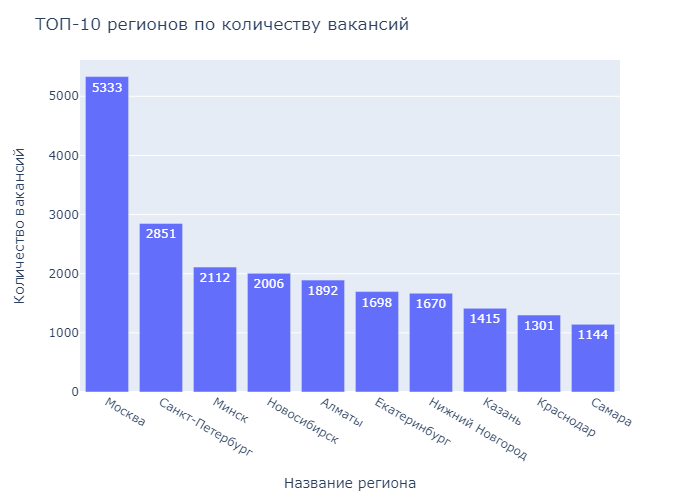

In [ ]:
df_count_vacancies = pd.read_sql_query(query_4_1, connection)    # Обрабатываем запрос, создаём DataFrame и присваиваем название таблице.

#Строим график спомощью библиотеки plotly для наглядного отображения полдученных данных. 
fig = px.bar(x=df_count_vacancies["area"], y=df_count_vacancies["count_vacancies"], text_auto=True)

fig.update_layout(
    barmode='stack',
    title=f"ТОП-{limit_4_1} регионов по количеству вакансий",
    yaxis_title_text='Количество вакансий',
    xaxis_title_text='Название региона'
    )
fig.show('png')

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
query_4_2 = f'''
    SELECT 
        COUNT (v.*)       
    FROM vacancies AS v
    WHERE (v.salary_from IS NOT NULL) OR (v.salary_to IS NOT NULL)    -- Учитываем только заполненные данные в признаках заработной платы
'''

In [ ]:
df_salary_not_NULL = pd.read_sql_query(query_4_2, connection)         # Обрабатываем запрос, создаём DataFrame
display(f'В {df_salary_not_NULL.iloc[0][0]} вакансиях указана зарплата') 

'В 24073 вакансиях указана зарплата'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
query_4_3 = f'''
    SELECT  
        AVG (v.salary_from),   -- подсчитываем средную зарплату по двум столбцам
        AVG (v.salary_to)
    FROM vacancies AS v
'''

In [ ]:
df_salary = pd.read_sql_query(query_4_3, connection)
display(f'В среднем зарплаты колеблятся от {round(df_salary.iloc[0][0])} до {round(df_salary.iloc[0][1])} рублей')

'В среднем зарплаты колеблятся от 71065 до 110537 рублей'

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
query_4_4 = f'''
    SELECT 
        v.schedule AS "Рабочий график",                 
        v.employment AS "Тип трудоустройства",
        COUNT (v.*) AS "Количество вакансий"        -- Подсчитываем количество вакансий
    FROM vacancies AS v
    GROUP BY v.schedule, v.employment               -- Группируем данные по столбцу рабочий график и тип трудоустройства.
    ORDER BY COUNT (v.*) DESC                       -- Сортируем данные по убыванию по количеству вакансий
'''

In [ ]:
df_schedule_employment = pd.read_sql_query(query_4_4, connection)  # Обрабатываем запрос, создаём DataFrame и присваиваем название таблице.
display("Количество вакансий распределённые по графику работы и типу трудоустройства")
display (df_schedule_employment)

,Рабочий график,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
query_4_5 = f'''
    SELECT 
        v.experience AS experience,
        COUNT (v.*) AS count_vacancies            -- Подсчитываем количество вакансий
    FROM vacancies AS v
    GROUP BY v.experience                         -- Группируем данные по опыту работы
    ORDER BY COUNT (v.*)                          -- Сортируем данные по убыванию по количеству вакансий
'''

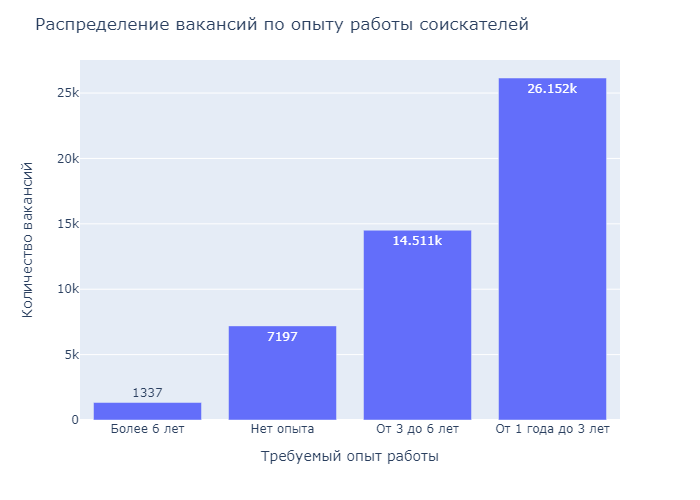

In [ ]:
df_experience = pd.read_sql_query(query_4_5, connection)   # Обрабатываем запрос, создаём DataFrame и присваиваем название таблице.

#Строим график спомощью библиотеки plotly для наглядного отображения полдученных данных. 
fig_4_5 = px.bar(x=df_experience["experience"], y=df_experience["count_vacancies"], text_auto=True)

fig_4_5.update_layout(
    barmode='stack',
    title="Распределение вакансий по опыту работы соискателей",
    xaxis_title_text='Требуемый опыт работы',
    yaxis_title_text='Количество вакансий'    
    )
fig_4_5.show('png')

***

1. Больше всего вакансий в базе данных представлено для *столицы и крупных городов России, а также столиц Беларуси и Казахстана*. В этих городах проживает **большее количество человек** и расположено **больше компаний**, чем в других городах. Так же стоит отметить, что проживающие в пригороде столиц и крупных городов, обычно каждый день приезжают туда на работу. 
2. Проанализировав количество вакансий, в которых *указана заработная плата*, мы видим, что **больше половины** работодателей не указывают какую заработную плату они готовы платит сотруднику. *Проведя дополнительный анализ по вакансиям*, где указана заработная плата, в зависимости от опыта работы соискателей мы видим, что практически **половина** из этих вакансий приходится на соискателей с опытом работы от 1 года до 3 лет. Но если смотреть *в разрезе распределения всех вакансий по опыту работы соискателей*, то можно отметить, что *самый высокий процент вакансий* с указанными заработными платами относится к соискателям без опыта работы. В таких вакансиях заработную плату указывают в **70 %** случаев. 
3. В вакансиях, где указана заработная плата, она колеблется от 71 до 110 тысяч, что **выше**, чем средняя заработная плата по России. *Проведя дополнительный анализ данных*, мы узнали, что самые высокие заработные платы предлагают при работе заграницей. В 20 регионах с самой высокой заработной платой лишь три относятся к России. Поэтому если необходим анализ данных только по России, требуется провести отчистку данных.  
4. В **почти 72 %** представленных вакансий работодателей рассчитывают, что сотрудник будет работать **полный день и полную занятость**. В **16 %** вакансиях, компании согласны работать с сотрудниками на полный рабочий день, но **удалённо**. После пандемии резко выросло количество вакансий, где предлагается удалённая работа. 
5. Проанализировав вакансии по опыту работы соискателей мы видим, что наименьшее количество вакансий (*всего 2,7%*) представлено для людей с **опытом работы от 6 лет**. Обычно, это уже *специалисты высокого уровня*, которые *не спешат сменить место работы*, потому что смогли найти наилучший для себя вариант. Обычно таких людей переманивают работодатели через личное знакомство, а не посредством вакансии и резюме. Соискателей в *14,6%* вакансий компании готовы рассматривать *без опыта работы*. Приём таких сотрудников несёт **риск** для компаний, так как большинство из сотрудников без опыта работы получив практические навыки и знания через пару лет *стремятся сменить работу*, чтобы получить новый опыт. Это **подтверждается и нашими данными**, так как именно для сотрудников с опытом работы *от 1 года до 3 лет* и с опытом работы *от 3 до 6 лет* представлено **наибольшее число вакансий**. (53 % и 29,5% соответственно).




# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# Задаём количество строк в итоговой таблице для анализа.
limit_5_1 = 10
query_5_1 = f'''
    SELECT 
        e.name AS name_employers,
        COUNT (v.*) AS count_vacancies                       -- Подсчитываем количество вакансий
    FROM vacancies AS v
    JOIN employers AS e ON e.id = v.employer_id              -- Связываем таблицы vacancies и employers по ключевым стоблбцам
    GROUP BY e.name                                          -- Группируем данные по названию компании
    ORDER BY COUNT (v.*) DESC                                -- Сортируем полученные данные по количеству вакансий по убыванию
    LIMIT {limit_5_1}                                        
'''

'На первом месте по количеству вакансий находится компания "Яндекс"'

'На пятом месте по количеству вакансий находится компания "Газпром нефть"'

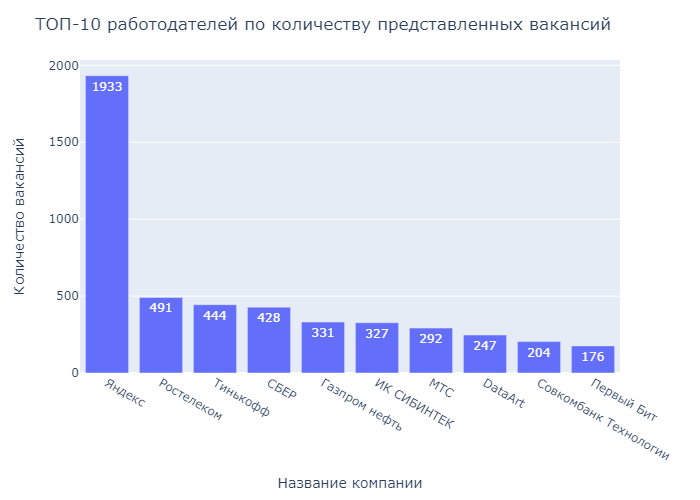

In [ ]:
df_employers_count = pd.read_sql_query(query_5_1, connection)
display(f'На первом месте по количеству вакансий находится компания "{df_employers_count.iloc[0][0]}"')
display(f'На пятом месте по количеству вакансий находится компания "{df_employers_count.iloc[4][0]}"')

#Строим график спомощью библиотеки plotly для наглядного отображения полдученных данных. 
fig_5_1 = px.bar(x=df_employers_count["name_employers"], y=df_employers_count["count_vacancies"], text_auto=True)

fig_5_1.update_layout(
    barmode='stack',
    title=f"ТОП-{limit_5_1} работодателей по количеству представленных вакансий",
    xaxis_title_text='Название компании',
    yaxis_title_text='Количество вакансий'    
    )
fig_5_1.show('png')

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
## Задаём количество строк для анализа.
limit_5_2 = 10
query_5_2 = f'''
    SELECT 
        a.name AS "Название региона",
        COUNT (e.id) AS "Количество работодателей",             -- Подсчитываем количество работодателей
        COUNT (v.id) AS "Количество вакансий"                   -- Подсчитываем количество вакансий
    FROM areas AS a
    -- Соединяем таблицу регионов и таблицу вакансий так, чтобы в регионах, где нет вакансий появились пустые строки.
    LEFT JOIN vacancies AS v ON a.id = v.area_id  
    -- Присоединяем к полученным данным таблицу с работодателями
    JOIN employers AS e ON e.area = a.id         
    -- Группируем данные по названию региона
    GROUP BY a.name                               
    -- Сортируем данные по количеству вакансий по возрастанию, а затем по количеству работодателей по убыванию
    ORDER BY 3, 2 DESC        
    LIMIT {limit_5_2}  
'''

In [ ]:
df_areas_vacancies_employers = pd.read_sql_query(query_5_2, connection)
display(f'Регион с наибольшим количеством работодателей, но без единой вакансии: {df_areas_vacancies_employers.iloc[0][0]}')
display(f"ТОП-{limit_5_2} регионов по количеству компаний без вакансий")
display (df_areas_vacancies_employers)

'Регион с наибольшим количеством работодателей, но без единой вакансии: Россия'

,Название региона,Количество работодателей,Количество вакансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
5,Беларусь,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
## Задаём количество строк для анализа.
limit_5_3 = 10

query_5_3 = f'''
    SELECT
        e.name AS name_employers,
        COUNT (DISTINCT v.area_id) AS count_area                -- Подсчитываем количество регионов
    FROM employers AS e 
    JOIN vacancies AS v ON e.id = v.employer_id                 -- Соединяем таблицы vacancies и employers по ключевым стоблбцам
    GROUP BY e.name                                             -- Группируем данные по названию компании
    ORDER BY COUNT (DISTINCT v.area_id) DESC                    -- Подсчитываем количество регионов исключая повторения
    LIMIT {limit_5_3}                                                    
'''

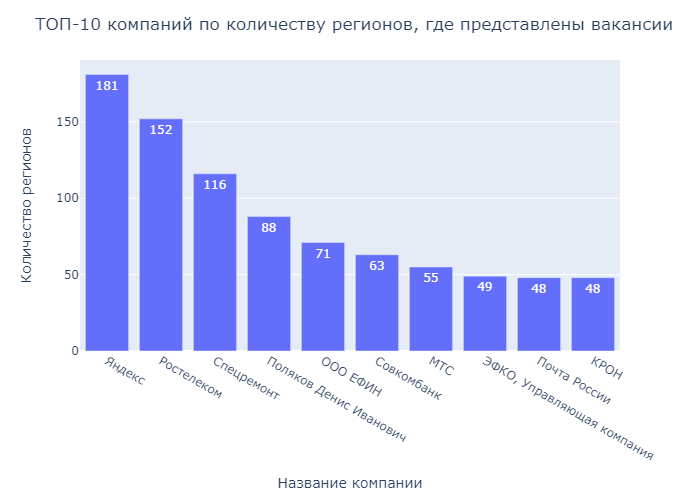

In [ ]:
df_areas_employers = pd.read_sql_query(query_5_3, connection)

#Строим график спомощью библиотеки plotly для наглядного отображения полдученных данных. 
fig_5_3 = px.bar(x=df_areas_employers["name_employers"], y=df_areas_employers["count_area"], text_auto=True)

fig_5_3.update_layout(
    barmode='stack',
    title=f'ТОП-{limit_5_3} компаний по количеству регионов, где представлены вакансии',
    xaxis_title_text='Название компании',
    yaxis_title_text='Количество регионов'    
    )
fig_5_3.show('png')

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
query_5_4 = f'''
    SELECT
        COUNT (e.id)                                        -- Подсчитываем количество работодателей
    FROM employers_industries AS ei 
    RIGHT JOIN employers AS e ON e.id = ei.employer_id      -- Соединяем таблицы employers_industries и employers по ключевым стоблбцам
    WHERE ei.industry_id is NULL
'''

In [ ]:
df_employers_no_industries = pd.read_sql_query(query_5_4, connection)
display(f'У {df_employers_no_industries.iloc[0][0]} работодателей не указана сфера деятельности')


'У 8419 работодателей не указана сфера деятельности'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
query_5_5 = f'''
    SELECT
        e.name
    FROM employers AS e  
    JOIN employers_industries AS ei ON e.id = ei.employer_id     -- Соединяем таблицы employers_industries и employers по ключевым стоблбцам
    GROUP BY e.name
    HAVING COUNT (DISTINCT ei.industry_id) = 4                   -- Выбираем только те компании, где указано 4 сферы деятельности
    ORDER BY e.name
    OFFSET 2                                                     -- Выводим данные в таблице начиная с 3 строки
    LIMIT 1                                                      -- Выводим только 1 строку
'''

In [ ]:
df_employers_four_industries = pd.read_sql_query(query_5_5, connection)
display(f'На третьем месте в алфавитном списке компаний, указавших 4 сферы деятельности, находится "{df_employers_four_industries.iloc[0][0]}"')

'На третьем месте в алфавитном списке компаний, указавших 4 сферы деятельности, находится "2ГИС"'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана "Разработка программного обеспечения".


In [ ]:
query_5_6 = f'''
    SELECT
        COUNT (ei.employer_id)                                 -- Подсчитываем количество компаний
    FROM employers_industries AS ei
    JOIN industries AS i ON i.id = ei.industry_id              -- Соединяем таблицы employers_industries и employers по ключевым стоблбцам
    WHERE i.name LIKE 'Разработка программного обеспечения'    -- Отбираем только те данные, где в качестве сфере деятельности встречается фраза 'Разработка программного обеспечения'
'''

In [ ]:
df_industry_software = pd.read_sql_query(query_5_6, connection)
display(f'{df_industry_software.iloc[0][0]} организации работают в сфере "Разработка программного обеспечения"')

'3553 организации работают в сфере "Разработка программного обеспечения"'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Задаём адрес ресурса
while True:
    response = requests.get(url) # Делаем GET-запрос к ресурсу
    if response.status_code == 200 :   #Если удалось загрузить данные, то работаем с ними дальше. 
        page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
        break


def cut_date (date_table):                                   #Функция для обработки полученных данных
    list_date=str()                                          #Создаём новый список
    for i in range(len(date_table)):                         #Перебираем полученные данные
        if 'title=' in str(date_table[i]):                   #Если встречаем 'title='
            list_split = str(date_table[i]).split('"')       #Режем строку по " и сохраняем в list_split
            if list_date == '': 
                list_date = "'" +str(list_split[3])+"'" 
            else: 
                list_date= list_date +", '"+str(list_split[3])+"'"                #Выбираем нужный элемент из списка и добавляем в изначальный список list_date
    return list_date 

# Создаём список городов-миллионников
million_city = cut_date(page.select('#mw-content-text > div.mw-parser-output > table.standard.sortable > tbody > tr > td > a'))

In [ ]:
query_5_7 = f'''
    SELECT
        a.name AS "Название региона",
        COUNT (v.name) AS "Количество вакансий"
    FROM employers AS e
    JOIN vacancies AS v ON e.id = v.employer_id
    JOIN areas AS a ON a.id = v.area_id
    WHERE e.name = 'Яндекс'
    GROUP BY  a.name
    HAVING a.name IN ({million_city})
UNION ALL
    SELECT 
        'total',
        COUNT (v.*)
    FROM employers AS e
    JOIN vacancies AS v ON e.id = v.employer_id
    JOIN areas AS a ON a.id = v.area_id
    WHERE (e.name = 'Яндекс') AND (a.name IN ({million_city}))
    ORDER BY 2 
'''

In [ ]:
df_Yandex = pd.read_sql_query(query_5_7, connection)
display('Список городов-миллионников, где представленны вакансии компании "Яндекс"')
display(df_Yandex)

KeyboardInterrupt: 

***

1. Проанализировав компании *по количеству представленных ими вакансий* мы видим, что первое место уверенно занимает компания "Яндекс". А первую пятёрку составляют крупные организации страны, предоставляющие наибольшее количество рабочий мест. Эти данные также стоит смотреть в разрезе вакансий по регионам, так как в IT-компаниях, таких как «Яндекс», возможна удалённая работа, а значит одна и та же вакансия может открываться в разных регионах. К тому же, у «Яндекс» такое большое количество вакансий ещё и потому, что под одним именем собраны все подразделения, включая такси, доставку и др.
2. Проанализировав в каких регионах больше всего работодателей, но нет вакансий, мы видимо, что в 10 таких регионов попали **страны, области и республики**. В этих регионах и не может быть вакансий, так как рабочие места, даже для удалённой работы, привязаны к *конкретным городам*. 
3. Выбрав для анализа 10 компаний по количеству регионов, где представлены вакансии мы видим, что *две лидирующие строчки совпадают с двумя лидирующими строками из анализа работодателей по количеству представленных вакансий*. Это подтверждает предположение, что компании выставляют **одни и те же вакансии в разных регионах**, так как принимают сотрудников для удалённой работы, либо для работы в дочерние организации. Например, как уже упоминалось, в случае «Яндекса» это может быть такси, доставка и т.д. потому что физические офисы компании есть лишь в 35 регионах мира. 
4. При анализе данных работодателей выявлено, что у 8419 компаний *не указана сфера деятельности*. Это почти **36 % компаний**. 
5. На третьем месте в алфавитном списке компаний, указавших 4 сферы деятельности, находится "2ГИС"
6. Из 23,5 тысяч компаний 3,5 тысячи работают в сфере разработки программного обеспечения. Это чуть больше **15%**. Что подтверждает статистику о том, что *с каждым годом количество IT-компаний увеличивается*.
7. Проанализировав вакансии, представленные компанией «Яндекс» мы видим, что **25%** из них представлены в городах-миллионниках России. То есть на 165 регионов, в которых размещаются вакансии, приходится 75 % вакансий. Так же можно отметить, что *в Москве и Санкт-Петербурге* количество вакансий **в два раза больше**, чем в Омске, находящемся на первом месте в таблице. 



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
query_6_1 = f'''
    SELECT
        COUNT (v.*)                                                        -- Подсчитываем количество вакансий
    FROM vacancies AS v
    WHERE (LOWER(v.name) LIKE '%data%') or (LOWER(v.name) LIKE '%данн%')   -- Отбираем только те данные, где встречаются 'data' или 'данн'
'''

In [ ]:
df_vacancies_data = pd.read_sql_query(query_6_1, connection)
display(f'{df_vacancies_data.iloc[0][0]} вакансия имеет отношение к данным')

'1771 вакансия имеет отношение к данным'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
#Так как следующие отчёты требуют отбора вакансий для специалистов Data Science, для удобства сохраним запрос в переменную и будем передавать её

query_DS = '''FROM
    -- Создаём таблицу из данных для сортировки
    (VALUES                                                             
            ('%data scientist%'),
            ('%data science%'),
            ('%исследователь данных%'),
            ('%machine learning%'),
            ('%машинн%обучен%')
    ) 
    -- Задаём псевдоним для созданной таблицы и название столбца
    AS p (pattern),       

 -- Присоединяем таблицу vacancies, перемножая каждую строку в vacancies со строкой из "p"          
LATERAL                                                                
    (SELECT
    v.*
        FROM vacancies AS v
        -- Отбираем среди полученных данных только те, что соответсвуют заданным праметрам в таблице p, предварительно переведя название в нижний регистр 
        WHERE ((lower(v.name) like p.pattern)       
        -- Так как "ML" может встречаться только в верхнем регистре, задаём дополнительную проверку.                    
           OR ((v.name like '%ML%') AND (v.name not like '%HTML%')))    
    ) 
    -- Задаём для получившейся таблицы псевдоним "x"
    AS x'''   

In [ ]:
query_6_2 = f'''SELECT
-- Подсчитываем количество уникальных значений
count (DISTINCT x.*) 

-- Подставляем запрос отбора вакансий, подготовленный заранее
{query_DS}

-- Отбираем среди полученных вакансий те, которые подходят для соискателей без опыта                                      
WHERE ((lower(name) like '%junior%')                                    
    OR (experience = 'Нет опыта')
    OR (employment = 'Стажировка'))
'''

In [ ]:
df_vacancies_ds = pd.read_sql_query(query_6_2, connection)
display(f'Для начинающего специалиста Data Science подходит {df_vacancies_ds.iloc[0][0]} вакансия')

'Для начинающего специалиста Data Science подходит 51 вакансия'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
query_6_3 = f'''SELECT
-- Подсчитываем количество уникальных значений
count (DISTINCT x.*) 

-- Подставляем запрос отбора вакансий, подготовленный заранее
{query_DS}

-- Отбираем среди полученных вакансий те, где требуется навык SQL или Postgres
WHERE key_skills ~~ '%SQL%' OR key_skills ~~ 'postgres'
'''

In [ ]:
df_vacancies_ds_SQL = pd.read_sql_query(query_6_3, connection)
display(f'Для {df_vacancies_ds_SQL.iloc[0][0]} вакансии специалиста Data Sciense требуется навык SQL или Postgres')

'Для 201 вакансии специалиста Data Sciense требуется навык SQL или Postgres'

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
query_6_4 = f'''SELECT
-- Подсчитываем количество уникальных значений
count (DISTINCT x.*) 

-- Подставляем запрос отбора вакансий, подготовленный заранее
{query_DS}

-- Отбираем среди полученных вакансий те, где требуется знание Python
WHERE x.key_skills ~~ '%Python%'
'''

In [ ]:
df_vacancies_ds_Python = pd.read_sql_query(query_6_4, connection)
display(f'Для {df_vacancies_ds_Python.iloc[0][0]} вакансии специалиста Data Sciense требуется знание Python')

'Для 351 вакансии специалиста Data Sciense требуется знание Python'

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
query_6_5 = f'''SELECT
-- Подсчитываем среднее количество ключевых навыков, вычитая из изначальной строки строку, 
-- в которой убираем табуляцию. Так как перед первым навыком не стоит табуляции, добавляем 1
Avg (LENGTH(v.key_skills)-LENGTH(REPLACE(v.key_skills, CHR(9),''))+1)
from vacancies v

-- Отбираем из вакансий те, что подходят для специалистов Data Science
WHERE
    ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT LIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    AND (key_skills IS NOT NULL)
'''

In [ ]:
df_skills = pd.read_sql_query(query_6_5, connection)
display(f'В среднем для специалиста Data Sciense указывают {round (df_skills.iloc[0][0],2)} ключевых навыка')

'В среднем для специалиста Data Sciense указывают 6.41 ключевых навыка'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
query_6_6 = f'''SELECT
    v.experience AS "Опыт работы",
    -- Подсчитываем среднее значение заработной платы, указанной в вакансиях. 
    -- Так как одна из зарплат может быть не указана, проверяем это через COALESCE
    -- Перед выводом округляем значение до целого числа 
    round(AVG(COALESCE((salary_from+salary_to)/2,salary_to,salary_from))) AS "Средняя зарплата"
    from vacancies v
    -- Отбираем из вакансий те, что подходят для специалистов Data Science
    WHERE
        ((v.name ILIKE '%data scientist%') OR (v.name ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%')
        OR ((v.name LIKE '%ML%') AND (v.name NOT LIKE '%HTML%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%'))
    -- Убираем из расчёта вакансии, где вообще не указана заработная плата или опыт
        AND ((v.salary_from IS NOT NULL or v.salary_to IS NOT NULL)) 
        AND v.experience IS NOT NULL
    -- Группируем данные по оптыу работы
    GROUP BY v.experience 
'''

In [ ]:
df_avg_salary = pd.read_sql_query(query_6_6, connection)
display(f'Специалист Data Science с опытом работы {df_avg_salary.iloc[2][0]} может расчитывать на среднюю зарплату {df_avg_salary.iloc[2][1]}')
#df_avg_salary = df_avg_salary.style.set_caption(f"Распределение заработной платы для специалиста Data Science в зависимсоти от опыта работы")
display (df_avg_salary)


'Специалист Data Science с опытом работы От 3 до 6 лет может расчитывать на среднюю зарплату 243115.0'

,Опыт работы,Средняя зарплата
0,Нет опыта,74643.000000
1,От 1 года до 3 лет,139675.000000
2,От 3 до 6 лет,243115.000000


***

1.	Из представленных вакансий только **3,6 %** имеют отношение к данным. Стоит отметить, что сюда относятся вакансии для аналитиков данных, Data Engineer, Data Science, Администратор баз данных и др.
2.	*Проведя дополнительный анализ мы выяснили*, что **по указанным параметрам** в базе данных всего 480 вакансий для специалистов Data Science. Если отбирать среди них те, что подходят для людей без опыта работы, то таких вакансий останется **всего 51**. А это больше 10 %. Анализируя вакансии по опыту работы мы уже отмечали, что *вакансий для начинающих специалистов не так много* из-за рисков перехода сотрудников в другие компании после получения первого опыта. Это и нестабильная ситуация в мире повлияла на то, что многие *организации стали с опаской нанимать сотрудников без опыта работы*.
3.	Среди вакансий для специалистов Data Science в 201 указан основной навык SQL или postgres. То есть для *41 %* вакансий требуется умение работать с базами данных и написание запросов. 
4.	А в 351 вакансии требуется знание языка Python. Это говорит о *популярности языка программирования* среди специалистов Data Science. 
5.	Но знания SQL и Python не залог успеха, так как в среднем для специалистов Data Science работодатели указывают **6 и более ключевых навыков**.
6.	Проанализировав заработную плату специалистов Data Science мы видим, что с увеличением опыта, значительно увеличивается заработная плата сотрудника. Практически в 2 раза. Это говорит о том, что на рынке очень ценят специалистов **с большим опытом**.   


# Общий вывод по проекту

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ. 

Для соискателей с каким опытом работы чаще указывают заработную плату. 

In [ ]:
query_7_1 = f'''
    SELECT 
        v.experience AS "Опыт работы",
        COUNT (v.id) AS "Количество вакансий"   -- Подсчитываем количество вакансий     
    FROM vacancies AS v
    WHERE (v.salary_from IS NOT NULL) OR (v.salary_to IS NOT NULL)   --Исключаем из таблицы вакансии, где не указана заработная плата
    GROUP BY v.experience                      -- Для подсчёта количества вакансий группируем их по опыту работы соискателей
'''

df_experience_salary = pd.read_sql_query(query_7_1, connection)
display("Количество вакансий, где указана заработная плата, в зависимости от опыта работы соискателей")
display(df_experience_salary)

,Опыт работы,Количество вакансий
0,Более 6 лет,550
1,От 3 до 6 лет,5649
2,Нет опыта,5055
3,От 1 года до 3 лет,12819


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ. 

Какую среднюю заработную плату указывают в разных регионах.

In [ ]:
## Задаём количество строк для анализа.
limit_7_2 = 20
query_7_2 = f'''
    SELECT
        a.name AS "Название региона",
        COUNT (v.name) AS "Количество вакансий",              -- Подсчитываем количество вакансий     
        ROUND(AVG(COALESCE((salary_from+salary_to)/2,salary_to,salary_from)), 0) AS "Средняя зарплата"
    FROM vacancies AS v 
    JOIN areas AS a ON a.id = v.area_id
    WHERE (v.salary_from IS NOT NULL) OR (v.salary_to IS NOT NULL)   --Исключаем из таблицы вакансии, где не указана заработная плата
    GROUP BY a.name                      -- Для подсчёта количества вакансий группируем их по опыту работы соискателей
    ORDER BY 3 DESC
    LIMIT {limit_7_2}
'''
df_area_salary = pd.read_sql_query(query_7_2, connection)
df_area_salary = df_area_salary.style.set_caption("Количество вакансий, где указана заработная плата, в зависимости от региона")
display(df_area_salary)

,Название региона,Количество вакансий,Средняя зарплата
0,Германия,2,452751.000000
1,Болгария,3,324348.000000
2,Испания,1,300000.000000
3,Черногория,4,288589.000000
4,Литва,2,263019.000000
5,Польша,3,257156.000000
6,Петропавловка (Республика Бурятия),1,250000.000000
7,Турция,19,235435.000000
8,Кипр,39,223736.000000
9,Кутаиси,3,220475.000000


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ. 

Сколько всего есть вакансий для специалистов Data Science.

In [ ]:
query_7_3 = f'''SELECT
    DISTINCT (x.id) AS "ID вакансии",
    x.name AS "Название вакансии" 
    
{query_DS}

'''

df_vacancies_ds_all = pd.read_sql_query(query_7_3, connection)
display(f'Для специалиста Data Science подходит {df_vacancies_ds_all.shape[0]} вакансий')

'Для специалиста Data Science подходит 480 вакансий'

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ. Проверим правильно ли мы подобрали параметры и все ли отобранные компании подходят для специалистов Data Science.

In [ ]:
#Выведем первые 20 строк из полученной в предыдущей ячейке таблицы. 
df_vacancies_ds_all_head = df_vacancies_ds_all.head(20).style.set_caption("Отобранные вакансии для специалистов Data Science")
display(df_vacancies_ds_all_head)

,ID вакансии,Название вакансии
0,43183814,Data scientist
1,43366306,Data scientist по построению моделей оценки кредитного риска (Big Data)
2,44095047,Инженер-тестировщик в команду Machine Learning
3,47094497,Data scientist (проект Музыка)
4,47095350,Data scientist (проект Моменты)
5,47609430,Data scientist (Remote)
6,48138537,Lead NLP/ML Developer
7,48285387,ML Engineer/ Data Scientist (WAF)
8,48285425,ML Engineer/ Data Scientist (WAF)
9,48285467,ML Engineer/ Data Scientist (WAF)


Проанализировав полученную таблицу мы видим, что в отборанные вакансии попали и те, что не относятся к Data Science. Например, "Java Разработчик (направление AML)" или "MLOps Backend-разработчик". Поэтому необходимо уточнить требования для отбора вакансий. 

In [ ]:
query_7_4 = f'''SELECT
    DISTINCT (x.id) AS "ID вакансии",
    x.name AS "Название вакансии" 
    
FROM
    -- Создаём таблицу из данных для сортировки
    (VALUES                                                             
            ('%data scientist%'),
            ('%data science%'),
            ('%исследователь данных%'),
            ('%machine learning%'),
            ('%машинн%обучен%')
    ) 
    -- Задаём псевдоним для созданной таблицы и название столбца
    AS p (pattern),       

 -- Присоединяем таблицу vacancies, перемножая каждую строку в vacancies со строкой из "p"          
LATERAL                                                                
    (SELECT
    v.*
        FROM vacancies AS v
        -- Отбираем среди полученных данных только те, что соответсвуют заданным праметрам в таблице p, предварительно переведя название в нижний регистр 
        WHERE ((lower(v.name) like p.pattern)       
        -- Так как "ML" может встречаться только в верхнем регистре, задаём дополнительную проверку.                    
           OR ((v.name like '%ML %') AND (v.name not like '%HTML%') AND (v.name not like '%AML%')))    
    ) 
    -- Задаём для получившейся таблицы псевдоним "x"
    AS x   
'''

#Проверим результаты отбора
df_vacancies_ds_all1 = pd.read_sql_query(query_7_4, connection)
df_vacancies_ds_all1_head = df_vacancies_ds_all1.head(20).style.set_caption("Первые 20 вакансий для специалистов Data Science, отобранные по дополнительным параметрам")
display(df_vacancies_ds_all1_head)

,ID вакансии,Название вакансии
0,43183814,Data scientist
1,43366306,Data scientist по построению моделей оценки кредитного риска (Big Data)
2,44095047,Инженер-тестировщик в команду Machine Learning
3,47094497,Data scientist (проект Музыка)
4,47095350,Data scientist (проект Моменты)
5,47609430,Data scientist (Remote)
6,48138537,Lead NLP/ML Developer
7,48285387,ML Engineer/ Data Scientist (WAF)
8,48285425,ML Engineer/ Data Scientist (WAF)
9,48285467,ML Engineer/ Data Scientist (WAF)


In [ ]:
df_vacancies_ds_all1_tail= df_vacancies_ds_all1.tail(20).style.set_caption("Последние 20 вакансий для специалистов Data Science, отобранные по дополнительным параметрам")
display(df_vacancies_ds_all1_tail)

,ID вакансии,Название вакансии
402,66093837,Data Scientist
403,66096082,Python-разработчик в команду Data Science
404,66104113,Python-разработчик в команду Data Science
405,66104114,Python-разработчик в команду Data Science
406,66104115,Python-разработчик в команду Data Science
407,66104116,Python-разработчик в команду Data Science
408,66108173,ML Engineer \ Data scientist
409,66109316,Senior Data Scientist (Cross Content Galaxy Team)
410,66109317,Senior Data Scientist (Cross Content Galaxy Team)
411,66109318,Senior Data Scientist (Cross Content Galaxy Team)


In [ ]:
display(f'По дополнительным параметрам отбора для Data Science подходит {df_vacancies_ds_all1.shape[0]} вакансии')

'По дополнительным параметрам отбора для Data Science подходит 422 вакансии'


Проведя анализ вакансий с сайта HeadHunter мы выявили, что **наибольшее количество вакансий** представлено *для крупных городов* и соискателей с опытом работы *от 1 года до 3 лет* и с запросом на работу полный рабочий день и полную занятость. В большей половине из них не указана заработная плата, а вакансиями, где она указана чаще всего привлекают соискателей без опыта работы. 

После *анализа компаний* мы увидели, что первые места по количеству представляемых вакансий уверенно занимают **крупнейшие компании в России**. У 36 % компаний не указана сфера деятельности, что может ввести в заблуждение соискателя. Из всех представленных компаний лишь *15 % работают в сфере «Разработка программного обеспечения»*, и сейчас от них выставлено лишь 480 вакансий в сфере Data Science. Примечательно, что 10 % из них представлено для соискателей без опыта работы. Стоит отметить, что для специалистов Data Science выдвигаются высокие требования, так как от них просят более 6 ключевых навыков. Но это вознаграждается высокой заработной платой, которая существенно возрастает в зависимости от опыта работы.

Для проведения *более глубокого анализа*, мы определили, что отбор вакансий для специалистов Data Science содержит **вакансии для других направлений**, поэтому проведёнг дополнительная отчистка данных. Исключив, лишние вакансии, оказалось, что лишь 422, а не 480 подходит для специалистов Data Science. При построении модели машинного обучения необходимо правильно подходить к отбору вакансий, чтобы исключить ошибки. 

Так же стоит отметить, что если требуется анализ вакансий для соискателей, работающих в России или необходим анализ предлагаемой заработной платы, то требуется **дополнительная отчистка данных**.